In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
sales_df = pd.read_csv('/content/drive/MyDrive/orders_2019.csv')

In [4]:
sales_df.head()

,Prodnrkurz,KundenNr,postal code,VersandArt,Geliefert,BestellZeit,BestellTag,Abteilung
0,00553,15210.0,NL 6461 BP,Abholung,1.0,15:31:13,19.12.2018,Export
1,OL2339,1400012.0,73614,UPS-Standard,1.0,13:11:16,28.12.2018,Einkauf
2,BW2124,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop
3,BW2125,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop
4,vn5335d,14001.0,52068,Abholung,1.0,08:16:26,19.12.2018,Einkauf_Layout


In [5]:
# find the rows with NAN
nan_df = sales_df[sales_df.isna().any(axis=1)]
nan_df.head()

,Prodnrkurz,KundenNr,postal code,VersandArt,Geliefert,BestellZeit,BestellTag,Abteilung
223,JE2023,1400012.0,NaN,Abholung,1.0,09:22:09,04.01.2019,Einkauf
336,vna6060,1400012.0,NaN,Abholung,1.0,11:11:43,07.01.2019,Einkauf_Layout
1009,0.999990,1400011.0,NaN,Abholung,1.0,08:46:23,15.01.2019,Einkauf_Layout
1178,bw2251,1400010.0,NaN,Abholung,1.0,12:47:44,09.01.2019,Einkauf_Layout
1377,je2037,1400011.0,NaN,Abholung,1.0,15:48:07,16.01.2019,Einkauf_Layout


In [6]:
sales_df.columns = sales_df.columns.str.replace(' ', '') 

In [7]:
sales_df = sales_df.dropna(how='all')# remove the rows with NAN
sales_df.head()

,Prodnrkurz,KundenNr,postalcode,VersandArt,Geliefert,BestellZeit,BestellTag,Abteilung
0,00553,15210.0,NL 6461 BP,Abholung,1.0,15:31:13,19.12.2018,Export
1,OL2339,1400012.0,73614,UPS-Standard,1.0,13:11:16,28.12.2018,Einkauf
2,BW2124,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop
3,BW2125,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop
4,vn5335d,14001.0,52068,Abholung,1.0,08:16:26,19.12.2018,Einkauf_Layout


In [8]:
sales_df['postalcode'] = sales_df['postalcode'].str.replace(' ', '')

In [9]:
sales_df['postalcode'] = sales_df['postalcode'].astype(str)

In [10]:
sales_df['KundenNr'] = sales_df['KundenNr'].astype(str)

In [11]:
### Check if there is NAN still
sales_df[sales_df.isna().any(axis=1)]
sales_df.head()

,Prodnrkurz,KundenNr,postalcode,VersandArt,Geliefert,BestellZeit,BestellTag,Abteilung
0,00553,15210.0,NL6461BP,Abholung,1.0,15:31:13,19.12.2018,Export
1,OL2339,1400012.0,73614,UPS-Standard,1.0,13:11:16,28.12.2018,Einkauf
2,BW2124,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop
3,BW2125,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop
4,vn5335d,14001.0,52068,Abholung,1.0,08:16:26,19.12.2018,Einkauf_Layout


In [12]:
new_date_format = sales_df.BestellTag.str.replace('/','-')

In [13]:
sales_df['new_date'] = pd.to_datetime(new_date_format)

In [14]:
sales_df.dtypes

Prodnrkurz             object
KundenNr               object
postalcode             object
VersandArt             object
Geliefert             float64
BestellZeit            object
BestellTag             object
Abteilung              object
new_date       datetime64[ns]
dtype: object

In [15]:
sales_df.set_index('new_date', inplace = True)

In [16]:
sales_df.head()

,Prodnrkurz,KundenNr,postalcode,VersandArt,Geliefert,BestellZeit,BestellTag,Abteilung
new_date,,,,,,,,
2018-12-19,00553,15210.0,NL6461BP,Abholung,1.0,15:31:13,19.12.2018,Export
2018-12-28,OL2339,1400012.0,73614,UPS-Standard,1.0,13:11:16,28.12.2018,Einkauf
2018-12-28,BW2124,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop
2018-12-28,BW2125,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop
2018-12-19,vn5335d,14001.0,52068,Abholung,1.0,08:16:26,19.12.2018,Einkauf_Layout


In [17]:
sales_df['month'] = sales_df.index.month
sales_df['year'] = sales_df.index.year
sales_df.head()

,Prodnrkurz,KundenNr,postalcode,VersandArt,Geliefert,BestellZeit,BestellTag,Abteilung,month,year
new_date,,,,,,,,,,
2018-12-19,00553,15210.0,NL6461BP,Abholung,1.0,15:31:13,19.12.2018,Export,12,2018
2018-12-28,OL2339,1400012.0,73614,UPS-Standard,1.0,13:11:16,28.12.2018,Einkauf,12,2018
2018-12-28,BW2124,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop,12,2018
2018-12-28,BW2125,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop,12,2018
2018-12-19,vn5335d,14001.0,52068,Abholung,1.0,08:16:26,19.12.2018,Einkauf_Layout,12,2018


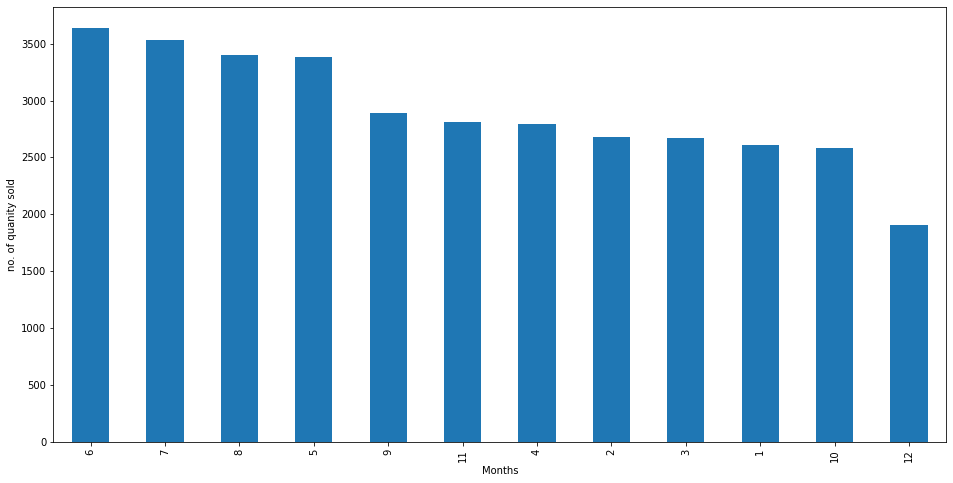

In [18]:
plt.figure(figsize=(16, 8))
sales_df['month'].value_counts().plot(kind='bar')
plt.ylabel('no. of quanity sold')
plt.xlabel('Months')
plt.show()

<Figure size 1080x576 with 0 Axes>

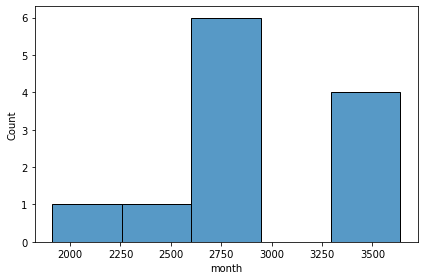

<Figure size 1080x576 with 0 Axes>

In [19]:
sns.histplot(sales_df['month'].value_counts())
plt.tight_layout()
plt.figure(figsize=(15,8))

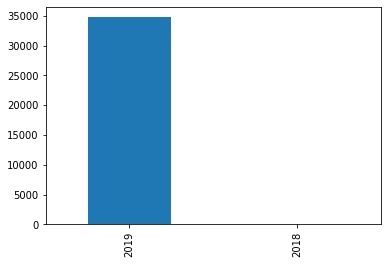

In [20]:
sales_df['year'].value_counts().plot(kind='bar')
plt.show()

In [21]:
sales_df.Prodnrkurz.nunique()

7069

In [22]:
sales_df.KundenNr.nunique()

567

In [23]:
sales_df.postalcode.nunique()

1648

In [24]:
sales_df.Abteilung.nunique()

10

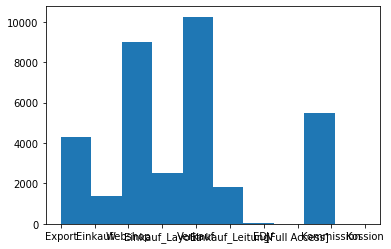

In [25]:
plt.hist(sales_df.Abteilung)
plt.show()

In [26]:
sns.set_theme()

<Figure size 1080x576 with 0 Axes>

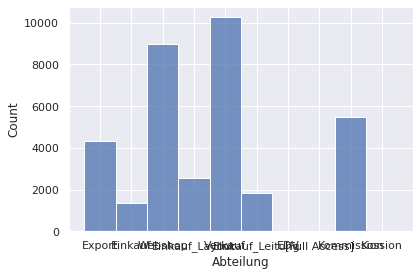

<Figure size 1080x576 with 0 Axes>

In [27]:
sns.histplot(sales_df['Abteilung'])
plt.tight_layout()
plt.figure(figsize=(15,8))

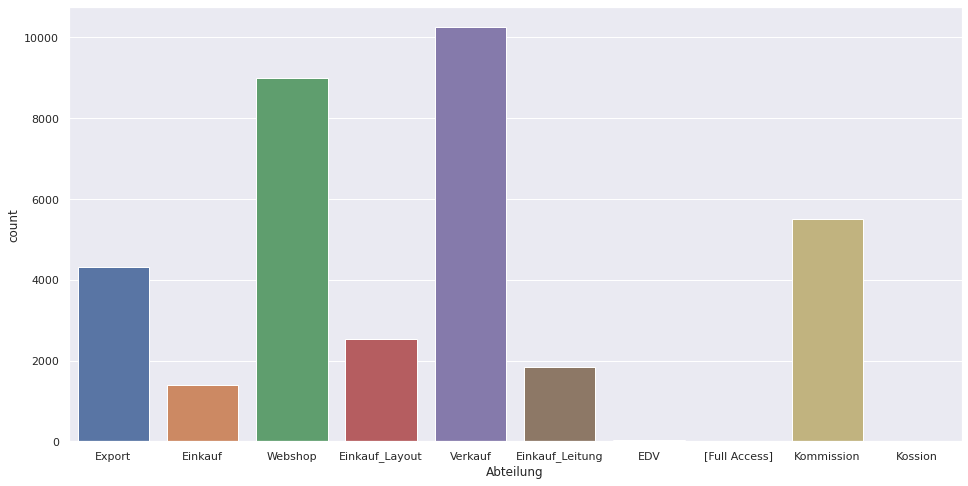

In [28]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Abteilung', data = sales_df)


In [29]:
sales_df.head()

,Prodnrkurz,KundenNr,postalcode,VersandArt,Geliefert,BestellZeit,BestellTag,Abteilung,month,year
new_date,,,,,,,,,,
2018-12-19,00553,15210.0,NL6461BP,Abholung,1.0,15:31:13,19.12.2018,Export,12,2018
2018-12-28,OL2339,1400012.0,73614,UPS-Standard,1.0,13:11:16,28.12.2018,Einkauf,12,2018
2018-12-28,BW2124,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop,12,2018
2018-12-28,BW2125,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop,12,2018
2018-12-19,vn5335d,14001.0,52068,Abholung,1.0,08:16:26,19.12.2018,Einkauf_Layout,12,2018


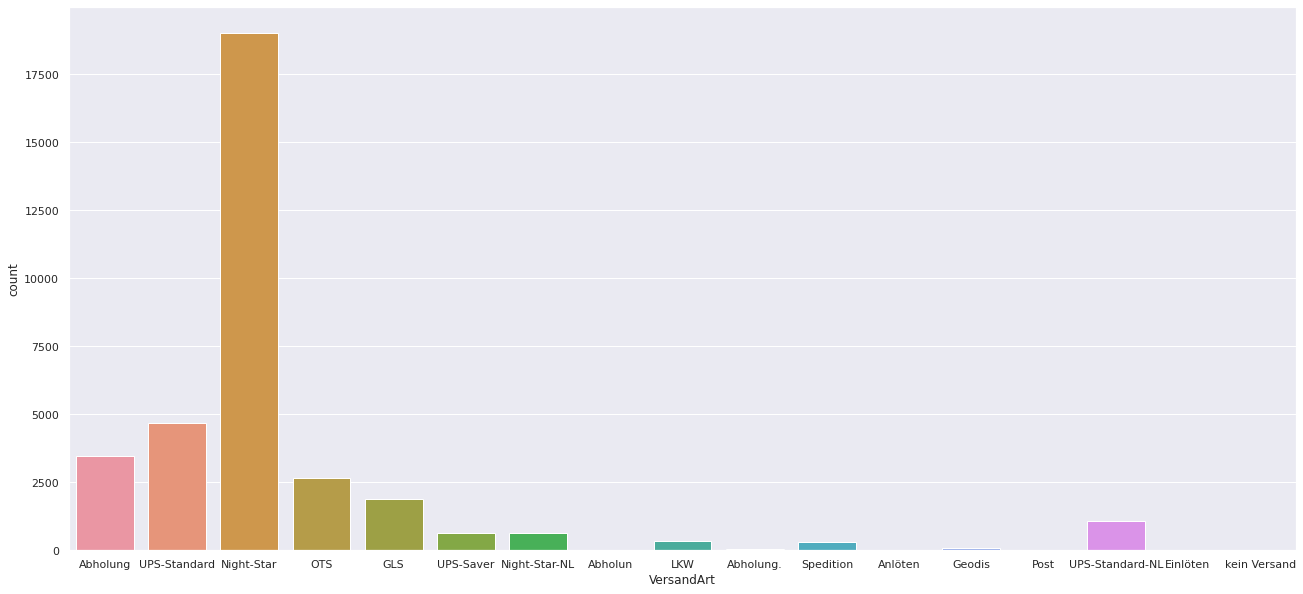

In [30]:

plt.figure(figsize=(22, 10))
sns.countplot(x='VersandArt', data = sales_df)

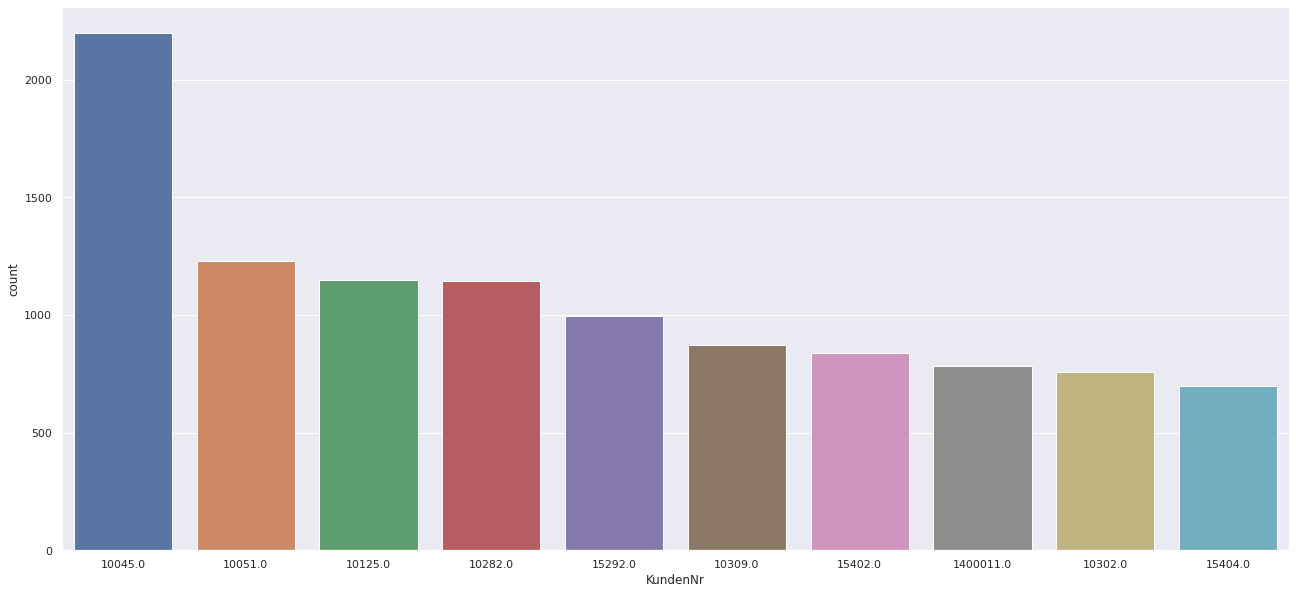

In [31]:
plt.figure(figsize=(22, 10))
sns.countplot(x='KundenNr', order = sales_df.value_counts(sales_df['KundenNr']).iloc[:10].index, data = sales_df)

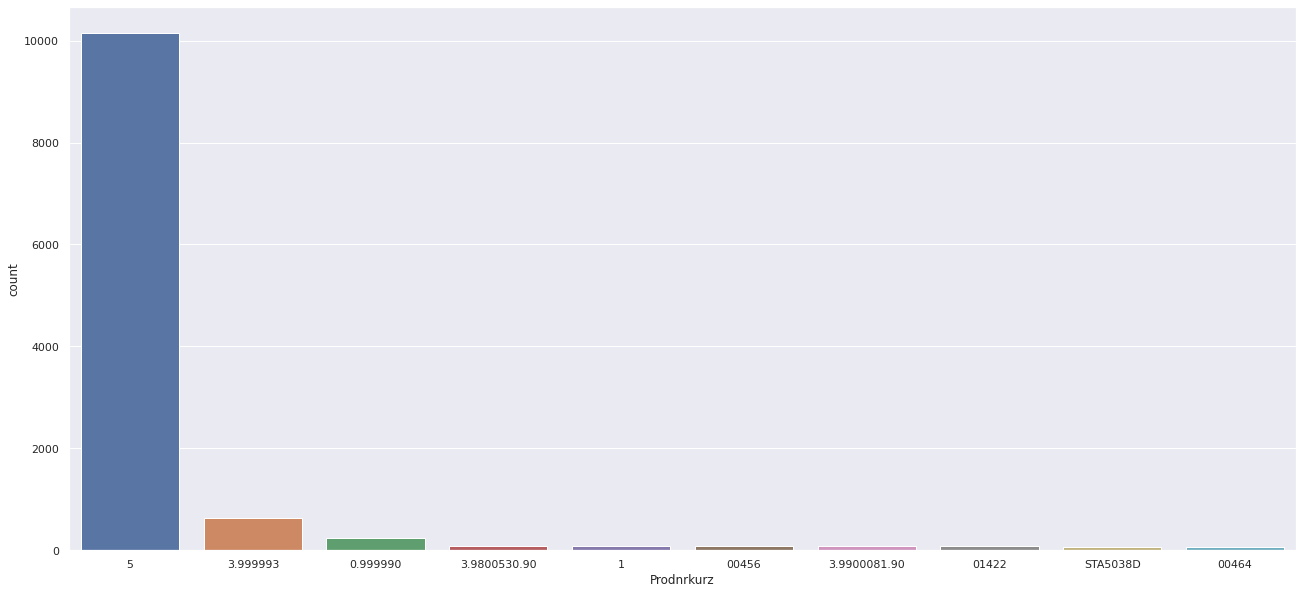

In [32]:
plt.figure(figsize=(22, 10))
sns.countplot(x='Prodnrkurz', order = sales_df.value_counts(sales_df['Prodnrkurz']).iloc[:10].index, data = sales_df)

In [33]:
sales_df.head()

,Prodnrkurz,KundenNr,postalcode,VersandArt,Geliefert,BestellZeit,BestellTag,Abteilung,month,year
new_date,,,,,,,,,,
2018-12-19,00553,15210.0,NL6461BP,Abholung,1.0,15:31:13,19.12.2018,Export,12,2018
2018-12-28,OL2339,1400012.0,73614,UPS-Standard,1.0,13:11:16,28.12.2018,Einkauf,12,2018
2018-12-28,BW2124,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop,12,2018
2018-12-28,BW2125,10437.0,25337,Night-Star,1.0,13:54:34,28.12.2018,Webshop,12,2018
2018-12-19,vn5335d,14001.0,52068,Abholung,1.0,08:16:26,19.12.2018,Einkauf_Layout,12,2018


In [34]:
sales_df.dtypes

Prodnrkurz      object
KundenNr        object
postalcode      object
VersandArt      object
Geliefert      float64
BestellZeit     object
BestellTag      object
Abteilung       object
month            int64
year             int64
dtype: object